In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action="once")
from multiprocessing import  Pool

sns.set_style("darkgrid", {'xtick.top': True, 'ytick.right': True,'xtick.bottom': True, 'ytick.left': True,'grid.linestyle': '--','image.cmap': 'viridis','xtick.direction': 'in', 'ytick.direction': 'in'})

# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'


# @global settings

FIG_DPI      = 800
FIG_EXT      = '.pdf'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT):
    if name != '':
        handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)
        
def parallelize_dataframe(n_cores, func, df, *args):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.starmap(func, [(d,*args) for d in df_split]))
    pool.close()
    pool.join()
    return df

def parallelize(n_cores, func, splited_data, *args):
    pool = Pool(n_cores)
    df = pool.starmap(func, [(d,*args) for d in splited_data])
    pool.close()
    pool.join()
    return df

Populating the interactive namespace from numpy and matplotlib


In [2]:
def draw_errors(data, method):
    test_num = len(data)
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(1, 1, 1)
    for d, m in zip(data, method):
        ax.plot(d['time'], np.abs(d['$E_{tot}$']),'-.', lw=1,label=m)
        ax.set_yscale('log')
        ax.set_xlabel('time')
        ax.set_ylabel('$\Delta E$')
    ax.legend()
    

<>:9: DeprecationWarning: invalid escape sequence \D


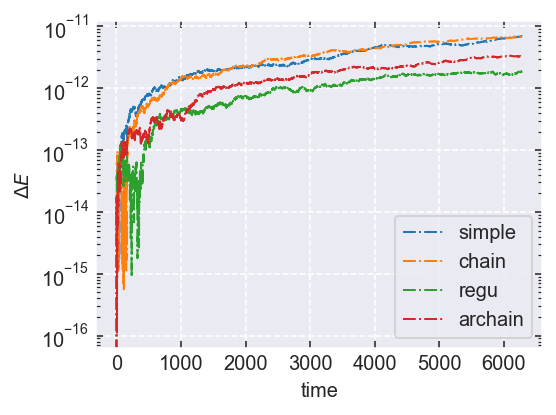

In [53]:
method = ['simple', 'chain', 'regu', 'archain']
fnames = ['cmake-build-debug/circular-BS-' + m + '.err' for m in method]
data = [ pd.read_csv(name, names = ['time','$E_{tot}$']) for name in fnames]
draw_errors(data, method)


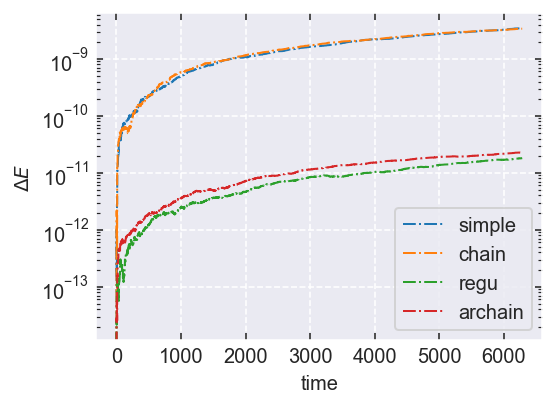

In [54]:
fnames = ['cmake-build-debug/ecc-BS-' + m + '.err' for m in method]
data = [ pd.read_csv(name, names = ['time','$E_{tot}$']) for name in fnames]
draw_errors(data, method)

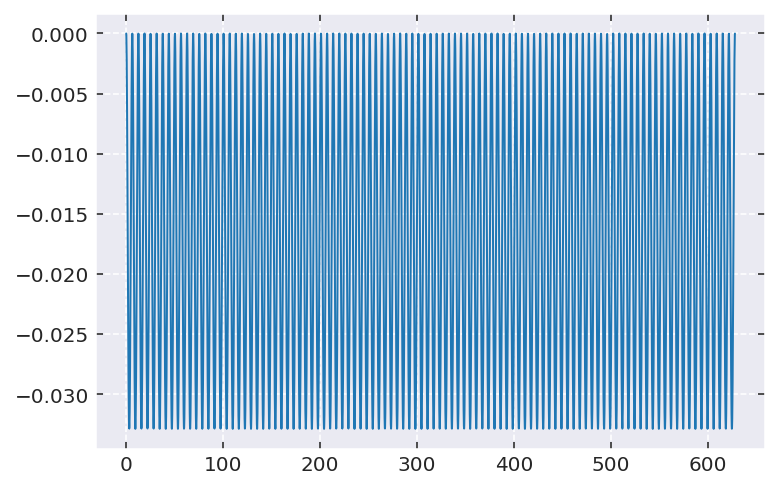

In [146]:
do = (energy['omega'] - energy['omega'][0])/energy['omega'][0]
plt.plot(energy['time'], do,'-', lw=1)
